# import all the libraries

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

# load in the dataset and EDA
 - Dataset is from a kaggle competition - Facial Keypoints Detection
     - The dataset contains images of faces and their corresponding keypoints
     - The keypoints are the points on the face that are used to detect the face
     - The dataset is split into training and testing sets
     - [click the link to see the dataset](https://www.kaggle.com/c/facial-keypoints-detection)

 - Data Description (from kaggle)
   - Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:
   - left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip
   - Left and right here refers to the point of view of the subject.
   - In some examples, some of the target keypoint positions are misssing (encoded as missing entries in the csv, i.e., with nothing between two commas).
   - The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

 - Data files (from kaggle)
    - training.csv: list of training 7049 images. Each row contains the (x,y) coordinates for 15 keypoints, and image data as row-ordered list of pixels.
    - test.csv: list of 1783 test images. Each row contains ImageId and image data as row-ordered list of pixels
    - submissionFileFormat.csv: list of 27124 keypoints to predict. Each row contains a RowId, ImageId, FeatureName, Location. FeatureName are "left_eye_center_x," "right_eyebrow_outer_end_y," etc. Location is what you need to predict.

In [2]:
pd.options.display.max_columns = 999
df = pd.read_csv('training/training.csv')
df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  right_eye_outer_corner_x  \
0                 37.389402                 23.452872   
1                 34.361532                 24.472511   
2                 36.320968                 24.976421   
3                 38.754115                 25.307270   
4                 39.094852                 22.506110   

   right_eye_outer_corner_y  left_eyebrow_inner_end_x  \
0                 37.389402                 56.953263   
1                 33.144443                 53.987404   
2                 36.603221                 55.742526   
3                 38.007903                 56.433809   
4                 38.305237                 57.249571   

   left_eyebrow_inner_end_y  left_eyebrow_outer_end_x  \
0                 29.033648                 80.227128   
1                 28.275949                 78.634213   
2                 27.570947                 78.887368   
3                 30.929864                 77.910261   
4                 30.672177                 77.762945   

   left_eyebrow_outer_end_y  right_eyebrow_inner_end_x  \
0                 32.228138                  40.227609   
1                 30.405923                  42.728851   
2                 32.651621                  42.193895   
3                 31.665725                  41.671513   
4                 31.737247                  38.035436   

   right_eyebrow_inner_end_y  right_eyebrow_outer_end_x  \
0                  29.002322                  16.356379   
1                  26.146043                  16.865362   
2                  28.135453                  16.791158   
3                  31.049990                  20.458017   
4                  30.935382                  15.925870   

   right_eyebrow_outer_end_y  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                  29.647471   44.420571   57.066803            61.195308   
1                  27.058860   48.206298   55.660936            56.421447   
2                  32.087116   47.557263   53.538947            60.822947   
3                  29.909343   51.885078   54.166539            65.598887   
4                  30.672177   43.299534   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_botto

### Check for null values in the dataset

In [3]:
# Let's confirm that there are no null values
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

### Drop all the null values
 - if the image is not labeled, then it will not be used for training
 - thus all the null values must be dropped

In [4]:
# store the previous length of the Dataframe
prev_len = len(df)
# drop all N/A
df = df.dropna()
# store the new length of the Dataframe
new_len = len(df)

In [5]:
df.shape

(2140, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [7]:
df.dropna()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2277          67.180378          35.816373           33.239956   
2278          65.724490          36.301020           25.377551   
2281          68.430866          38.651975           28.895857   
2282          64.152180          30.691592           27.000898   
2283          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2277           34.921932                59.347973                37.000904   
2278           37.311224                58.530612                37.739796   
2281           37.617027                61.659350                40.100902   
2282           40.868082                56.505624                34.126963   
2283           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2277                72.667896                37.097600   
2278                74.448980                37.525510   
2281                75.586792                40.219182   
2282                73.436776                28.556335   
2283                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  \
0                    36.356571                 37.389402   
1                    36.034723                 34.361532   
2                    37.678105                 36.320968   
3                    37.618643                 38.754115   
4                    36.982380                 39.094852   
...                        ...                       ...   
2277                 39.404349                 36.589944   
2278                 33.551020                 38.107143   
2281                 37.665118                 39.087245   
2282                 34.746122                 40.506939   
2283                 37.478531                 39.398041   

      right_eye_outer_corner_x  right_eye_outer_corner_y  \
0                    23.452872                 37.389402   
1                    24.472511                 33.144443   
2                    24.976421                 36.603221   
3                    25.307270                 38.007903   
4                    22.506110                 38.305237   
...                        ...                       ...   
2277                 24.972418                 36.348203   
2278                 15.979592                 38.076531   
2281                 21.621652                 39.095524   
2282                 16.850204                 44.409861   
2283                 22.056816                 40.330122   

      left_eyebrow_inner_end_x  left_eyebrow_inner_end_y  \
0                    56.953263                 29.033648   
1                

In [8]:
df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  \
count               2140.000000               2140.000000   
mean                  36.603107                 37.920852   
std                    1.822784                  2.009505   
min                   24.112624                 26.250023   
25%                   35.495730                 36.766783   
50%                   36.620735                 37.920336   
75%                   37.665280                 39.143921   
max                   47.293746                 44.887301   

       right_eye_outer_corner_x  right_eye_outer_corner_y  \
count               2140.000000               2140.000000   
mean                  22.361617                 38.034571   
std                    2.768804                  2.654903   
min                   11.054589                 26.521633   
25%                   20.631964                 36.569765   
50%                   22.529600                 37.876900   
75%                   24.202338                 39.401034   
max                   40.050971                 50.002113   

       left_eyebrow_inner_end_x  left_eyebrow_inner_end_y  \
count               2140.000000               2140.000000   
mean                  56.147991                 29.222304   
std                    2.819914                  2.867131   
min                   35.581733                 15.859361   
25%                   54.562757                 27.590944   
50%                   56.239984                 29.468466   
75%                   57.926361                 31.079433   
max                   67.752000                 40.293408   

       left_eyebrow_outer_end_x  left_eyebrow_outer_end_y  \
count               2140.000000               2140.000000   
mean                  79.617523                 29.656570   
std                    3.312647                  3.627187   
min                   55.549929                 10.522325   
25%                   77.732395                 27.658656   
50%                   79.797607                 29.753523   
75%                   81.559651                 31.763791   
max                  

### Check the remaining Dataset
 - Since we dropped all the N/a values, our dataset shurnk substainally
 - as the cell below shows, we have dropped 4909 rows
 - there are only 2140 rows left for training.
 - However, we can do augmentation to increase the dataset size

In [9]:
f'Dropped {prev_len - new_len} columns, remaining col No.{new_len}'

'Dropped 4909 columns, remaining col No.2140'

### Try to see the use of the image column

In [10]:
df['Image'][1]

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [11]:
sample_array = np.fromstring(df['Image'][1], dtype=int, sep=' ')
sample_array, len(sample_array), math.sqrt(len(sample_array))

(array([219, 215, 204, ...,   1,   1,   1]), 9216, 96.0)

### Manipulate the Image col
 - since the image column is sorted as a string, it must be transformed into a numpy array and reshaped
 - We should use np.fromstring to convert the string into a numpy array
 - Since each image have 9216 pixels, and we valided the claim of kaggle, by sqrt(len(sample_array)), we can confirm that the image is 96x96 pixels
 - Thus, we use np.reshape() to reshape the array

In [12]:
# convert the string into a 96x96 numpy array
df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [13]:
# check the resized image shape
df['Image'][1].shape

(96, 96)

### Visualise the Image

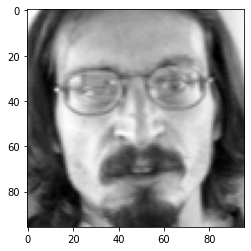

In [14]:
# plot the image at index 100
plt.imshow(df['Image'][100],cmap='gray')

### Visualise the keypoints
 - the dataset has 30 keypoints, and each keypoint is represented by an (x,y) pair; which are 15 points to be ploted for each image
 - the x and y coordinates are next to each other in columns, thus we loop through all the odd columns and plot the points

In [15]:
plt.figure()
plt.imshow(df['Image'][100],cmap='gray')
for j in range(1,31,2):
        plt.plot(df.loc[100][j-1], df.loc[100][j], 'rx')
# create the function for keypoint visualisation
def visualise_keypoints(df, index):
    plt.figure()
    plt.imshow(df['Image'][index],cmap='gray')
    for j in range(1,31,2):
        plt.plot(df.loc[index][j-1], df.loc[index][j], 'rx')


In [16]:
# visualise in a 7x7 grid
fig = plt.figure(figsize=(25, 25))

for i in range(49):
    ax = fig.add_subplot(7, 7, i + 1)
    image = plt.imshow(df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

### Augment Images
 - Since we have dropped all N/A values, we have lost substantial amount of the dataset items
 - As we have discussed before, we can use the augmentation techniques to increase the dataset size
    - We can flip the dataset horizontally and vertically
    - We can adjust the exposure of the image

### Flip the Dataframe horizontally

In [17]:
import copy
# Create a new copy of the dataframe
df_copy = copy.copy(df)

# obtain the header of the DataFrame (names of columns)
columns = df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

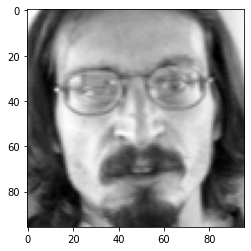

In [18]:
# plot the sample image
plt.imshow(df['Image'][100], cmap = 'gray')

In [19]:
# flip the image column horizontally
# using np.flip
df_copy['Image'] = df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

In [20]:
# check if the image is flipped by looking up the layer 0
df['Image'][100][0], df_copy['Image'][100][0]

(array([254, 251, 251, 252, 236, 181, 106,  67,  57,  55,  73,  83,  74,
         61,  48,  34,  38,  46,  58,  69,  70,  76,  87,  91,  85,  88,
         98,  97,  98, 100, 106, 108, 111, 116, 123, 129, 126, 131, 133,
        134, 135, 131, 136, 138, 144, 142, 145, 147, 149, 147, 139, 140,
        137, 134, 133, 131, 132, 129, 133, 132, 131, 125, 118, 117, 112,
        106,  97,  90,  80,  78,  75,  60,  49,  40,  39,  59,  80,  81,
         78,  87,  95, 103, 104, 133, 187, 210, 212, 219, 221, 225, 229,
        229, 233, 238, 240, 241]),
 array([241, 240, 238, 233, 229, 229, 225, 221, 219, 212, 210, 187, 133,
        104, 103,  95,  87,  78,  81,  80,  59,  39,  40,  49,  60,  75,
         78,  80,  90,  97, 106, 112, 117, 118, 125, 131, 132, 133, 129,
        132, 131, 133, 134, 137, 140, 139, 147, 149, 147, 145, 142, 144,
        138, 136, 131, 135, 134, 133, 131, 126, 129, 123, 116, 111, 108,
        106, 100,  98,  97,  98,  88,  85,  91,  87,  76,  70,  69,  58,
         46,  38

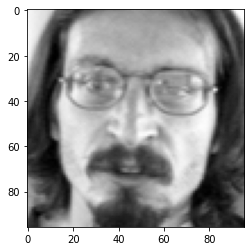

In [21]:
# Notice that the image is flipped now
plt.imshow(df_copy['Image'][100], cmap = 'gray')

In [22]:
# Since we flipped the images horizontally, y coordinate values would be the same
# subtract the initial x-coordinate values from width of the image(96) to get the flipped X-coordinate values
for i in range(len(columns)):
  if i%2 == 0:
    df_copy[columns[i]] = df_copy[columns[i]].apply(lambda x: 96. - float(x) )

(None, None)

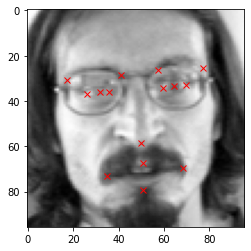

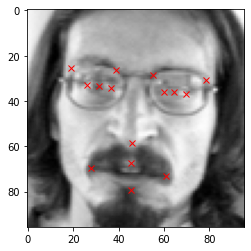

In [23]:
# View the Original image
# original on the left, flipped on the right
visualise_keypoints(df, 100), visualise_keypoints(df_copy,100)

In [24]:
df_merged = df.append(df_copy)
df_merged.shape

(4280, 31)

### Flip the images vertically

In [25]:
df_copy = copy.copy(df)

In [26]:
# Flip the image column vertically (note that axis = 0)
df_copy['Image'] = df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

# Since we are flipping the images vertically, x coordinate values would be the same
# y coordinate values only would need to change, all we have to do is to subtract our initial y-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 1:
    df_copy[columns[i]] = df_copy[columns[i]].apply(lambda x: 96. - float(x) )

(None, None)

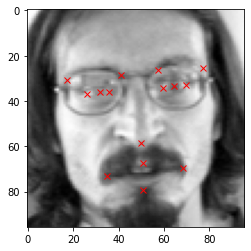

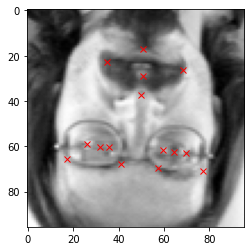

In [27]:
# View the Horizontally flipped image
# View the Original image
# original on the left, flipped on the right
visualise_keypoints(df, 100), visualise_keypoints(df_copy,100)

In [28]:
df_merged = df_merged.append(df_copy)
df_merged.shape

(6420, 31)

### increase the exposure of the image
 - We multiply pixel values by random values between 1 and 2 to increase the brightness of the image
 - clip the value between 0 and 255

In [29]:
import random
df_copy = copy.copy(df)
df_copy['Image'] = df['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))
df_merged = df_merged.append(df_copy)
df_merged.shape

(8560, 31)

In [30]:
df_merged.shape

(8560, 31)

(None, None)

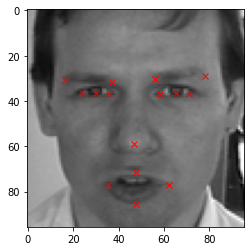

In [31]:
# check the image with increased Exposure
visualise_keypoints(df, 150), visualise_keypoints(df_copy,150)


### Decrease the exposure of the image
 - We multiply pixel values by random values between 0.7 and 0.8 to decrease the brightness of the image
 - clip the value between 0 and 255

In [32]:
# Randomly decrease image brightness
# Multiply pixel values by random values between 0 and 1 to decrease the brightness of the image
# Clip the value between 0 and 255

df_copy = copy.copy(df)
df_copy['Image'] = df['Image'].apply(lambda x:np.clip(x - random.uniform(0.7,0.8) * x, 0.0, 255.0))
# facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, df_copy))
# facialpoints_df_augmented.shape

In [33]:
df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [34]:
df_copy['Image'][0]

array([[61.58737216, 61.06983122, 61.32860169, ..., 64.69261781,
        64.69261781, 64.69261781],
       [60.81106075, 61.58737216, 61.06983122, ..., 64.43384734,
        64.69261781, 64.95138829],
       [61.32860169, 61.06983122, 61.32860169, ..., 64.95138829,
        64.95138829, 64.69261781],
       ...,
       [48.13130765, 47.35499624, 46.8374553 , ..., 13.45606451,
        14.74991686, 15.52622828],
       [48.90761907, 48.6488486 , 53.56548755, ..., 15.78499875,
        17.85516252, 20.18409676],
       [49.42516001, 47.61376671, 47.61376671, ..., 18.11393299,
        19.40778534, 23.28934241]])

### Decrease Exposure not Effective
 - As you can see, the image brightness is not decreased
 - at least it is not obvious enough to add to the training data


(None, None, None, None)

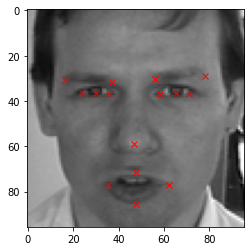

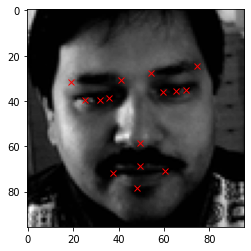

In [35]:
visualise_keypoints(df, 150), visualise_keypoints(df_copy,150), visualise_keypoints(df, 200), visualise_keypoints(df_copy,200)

In [36]:
img = df_merged.iloc[:, 30]
img.values

array([array([[238, 236, 237, ..., 250, 250, 250],
              [235, 238, 236, ..., 249, 250, 251],
              [237, 236, 237, ..., 251, 251, 250],
              ...,
              [186, 183, 181, ...,  52,  57,  60],
              [189, 188, 207, ...,  61,  69,  78],
              [191, 184, 184, ...,  70,  75,  90]]),
       array([[219, 215, 204, ...,  92,  88,  84],
              [222, 219, 220, ...,  92,  88,  86],
              [231, 224, 212, ...,  77,  80,  84],
              ...,
              [  1,   1,   1, ...,   1,   1,   1],
              [  1,   1,   1, ...,   1,   1,   1],
              [  1,   1,   1, ...,   1,   1,   1]]),
       array([[144, 142, 159, ..., 208, 207, 207],
              [143, 142, 161, ..., 208, 208, 207],
              [143, 140, 160, ..., 209, 209, 207],
              ...,
              [ 66,  70,  69, ...,  81, 134, 194],
              [ 65,  69,  71, ...,  75,  83, 109],
              [ 65,  68,  70, ...,  78,  78,  77]]), ...,
       array([

### Normalization and Data Preparation

In [37]:
# Obtain the value of 'Images' and normalize it
# Note that 'Images' are in the 31st column but since indexing start from 0, we refer 31st column by 30
img = df_merged.iloc[:, 30].values
img = img/255.

# Create an empty array of shape (10700, 96, 96, 1) to train the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the normalized images list and add image values to the empty array 
# Note that we need to expand it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [38]:
# Obtain the values of key face points coordinates, which are to used as target.
y = df_merged.iloc[:,:30].values
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [39]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [40]:
X_train.shape

(7704, 96, 96, 1)

In [41]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)    
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')
    


In [42]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [43]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage #1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage #2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,128,512], stage= 3)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

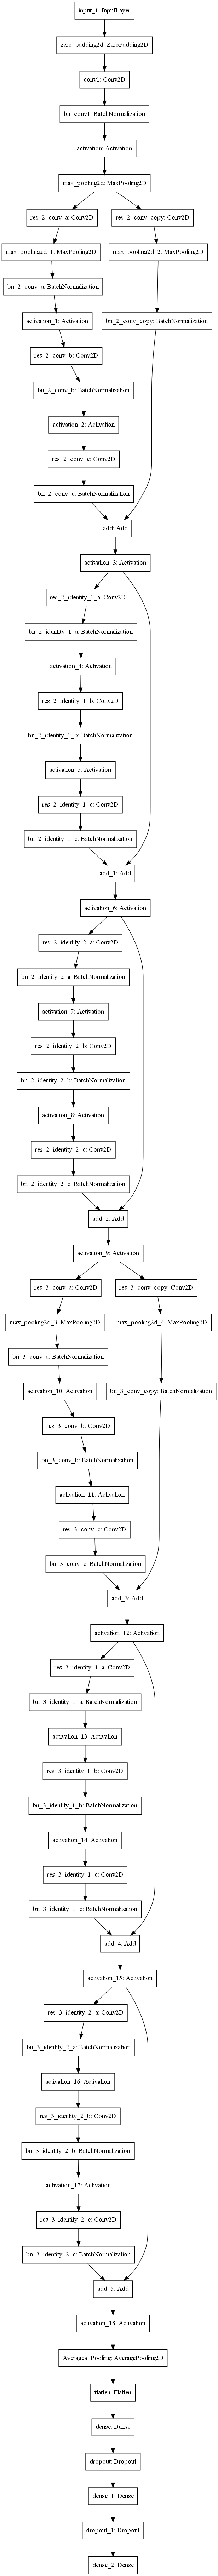

In [44]:
tf.keras.utils.plot_model(model, to_file='abc.png')


# Compile and Train

In [45]:
adam = tf.keras.optimizers.Adam(lr = 0.0005, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

C:\Users\stx6\miniconda3\envs\tf2.6\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [46]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)


In [47]:
history = model.fit(X_train, y_train, batch_size = 256, epochs= 100, validation_split = 0.1, callbacks=[checkpointer])


Epoch 1/100
28/28 [==============================] - 8s 57ms/step - loss: 508.6226 - accuracy: 0.2005 - val_loss: 2209.7739 - val_accuracy: 0.0000e+00

C:\Users\stx6\miniconda3\envs\tf2.6\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
28/28 [==============================] - 1s 37ms/step - loss: 151.8662 - accuracy: 0.6260 - val_loss: 1856.3956 - val_accuracy: 0.3320

In [48]:
history.history

{'loss': [508.62255859375,
  151.8661651611328,
  104.66707611083984,
  69.9211196899414,
  59.36083221435547,
  42.28129959106445,
  31.908885955810547,
  26.11377716064453,
  28.51780891418457,
  21.677547454833984,
  21.934370040893555,
  17.184833526611328,
  15.498922348022461,
  13.96677017211914,
  22.72808265686035,
  18.819570541381836,
  14.051094055175781,
  14.95038890838623,
  13.116621971130371,
  21.2962589263916,
  16.90365219116211,
  23.687026977539062,
  13.540611267089844,
  22.144092559814453,
  13.383810043334961,
  15.273094177246094,
  13.757792472839355,
  10.270280838012695,
  9.817176818847656,
  8.910951614379883,
  8.655862808227539,
  8.273252487182617,
  8.618626594543457,
  8.600739479064941,
  7.702624320983887,
  9.30777645111084,
  7.575118064880371,
  8.093262672424316,
  8.378337860107422,
  7.879158020019531,
  8.332172393798828,
  14.422924041748047,
  12.86007022857666,
  11.203563690185547,
  12.361804962158203,
  13.149685859680176,
  10.320569

# After training, plot the loss and accuracy curves

In [49]:
# Evaluate trained model

result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

27/27 [==============================] - 0s 8ms/step - loss: 51.6969 - accuracy: 0.7956
Accuracy : 0.7955607771873474


In [50]:
# Getting the model history keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

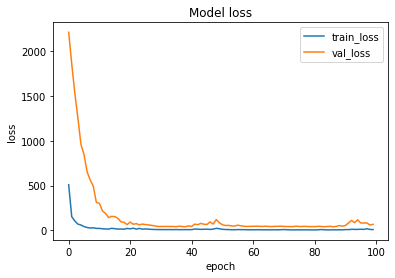

In [51]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [52]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

In [53]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 7.190055061309891


In [54]:
# Convert the predicted values into a dataframe

df_predict= pd.DataFrame(df_predict, columns = columns)
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.134796          54.540119           32.542751   
1          66.129555          38.881607           29.098465   
2          64.711983          34.300766           28.782198   
3          65.424332          40.952591           31.675856   
4          65.025024          37.348244           30.535257   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           57.274052                58.585014                53.659264   
1           36.180458                59.741886                38.927803   
2           37.655434                58.406780                35.137989   
3           36.057755                58.731190                41.137402   
4           39.129780                57.810631                38.411987   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.398277                53.124340                 38.931751   
1                72.110474                39.948341                 35.209702   
2                70.153015                34.318241                 34.909199   
3                72.821480                42.159069                 39.132423   
4                72.427658                37.894955                 37.779774   

   right_eye_inner_corner_y  right_eye_outer_corner_x  \
0                 55.630463                 25.225468   
1                 37.236561                 22.891800   
2                 37.674850                 22.941069   
3                 38.201160                 23.857332   
4                 39.737743                 22.916826   

   right_eye_outer_corner_y  left_eyebrow_inner_end_x  \
0                 56.989628                 56.336510   
1                 36.474987                 57.117397   
2                 39.552662                 55.780693   
3                 35.755188                 60.798862   
4                 40.677135                 54.253075   

   left_eyebrow_inner_end_y  left_eyebrow_outer_end_x  \
0                 61.241035                 79.623642   
1                 29.630226                 78.823296   
2                 26.945477                 75.812744   
3                 34.121517                 79.780891   
4                 29.562502                 78.217949   

   left_eyebrow_outer_end_y  right_eyebrow_inner_end_x  \
0                 59.756615                  41.514835   
1                 32.105896                  39.369343   
2                 26.159504                  36.622055   
3                 35.351788                  46.294697   
4                 30.539030                  40.467777   

   right_eyebrow_inner_end_y  right_eyebrow_outer_end_x  \
0                  62.456772                  20.563133   
1                  27.712130                  16.325159   
2                  28.947758                  15.820354   
3                  31.380327                  20.875084   
4                  30.446560                  16.377562   

   right_eyebrow_outer_end_y  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                  64.512154   45.829704   36.399292            60.301323   
1                  27.553131   47.572205   54.929268            59.567158   
2                  32.506577   49.336773   46.568344            63.448547   
3                  27.166573   49.049232   58.995075            53.980270   
4                  33.762569   48.520878   54.813137            64.163185   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            17.620716             30.904491             20.214243   
1            76.931252             29.926088             75.242279   
2            70.638298             36.347778             73.711761   
3            71.150169             21.604700             66.926582   
4            73.262619             32.972675             74.916763   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_botto

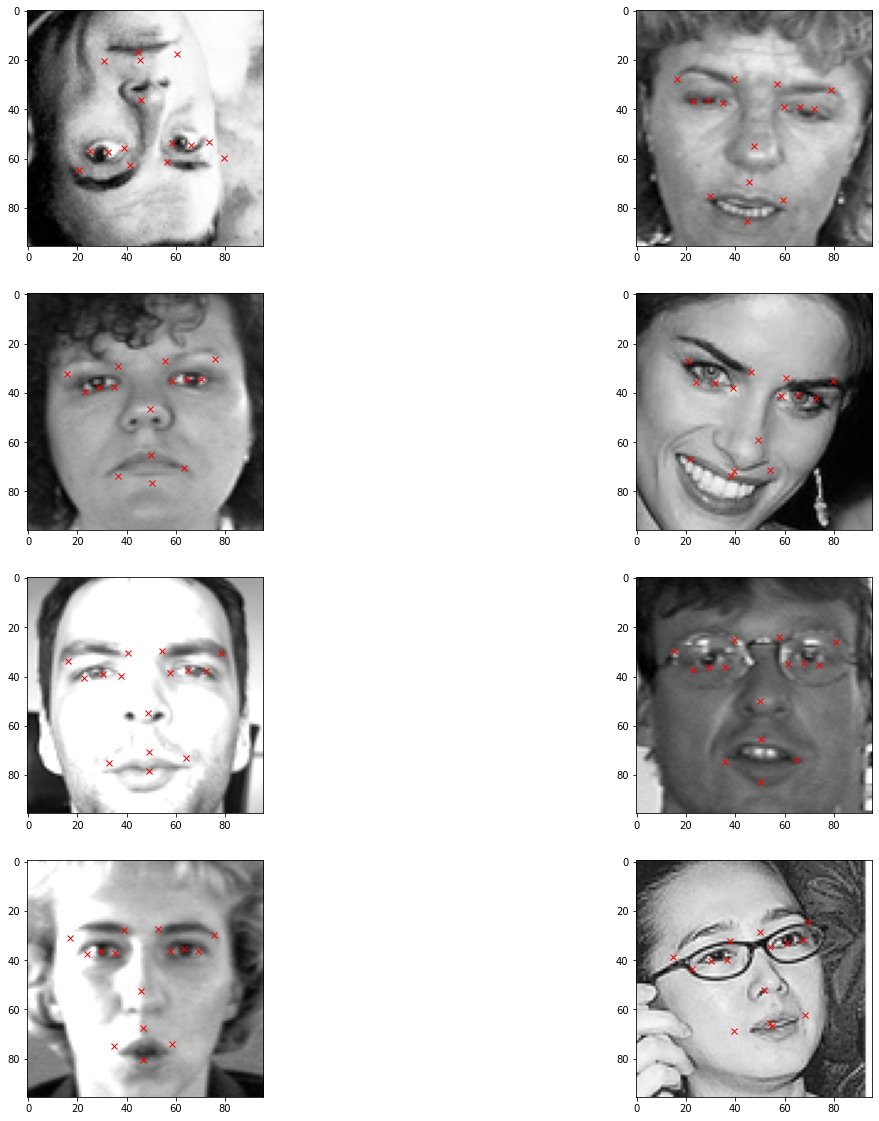

In [55]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


